In [202]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [203]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [205]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [206]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [207]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [208]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [209]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [210]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [211]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

<Axes: xlabel='Date'>

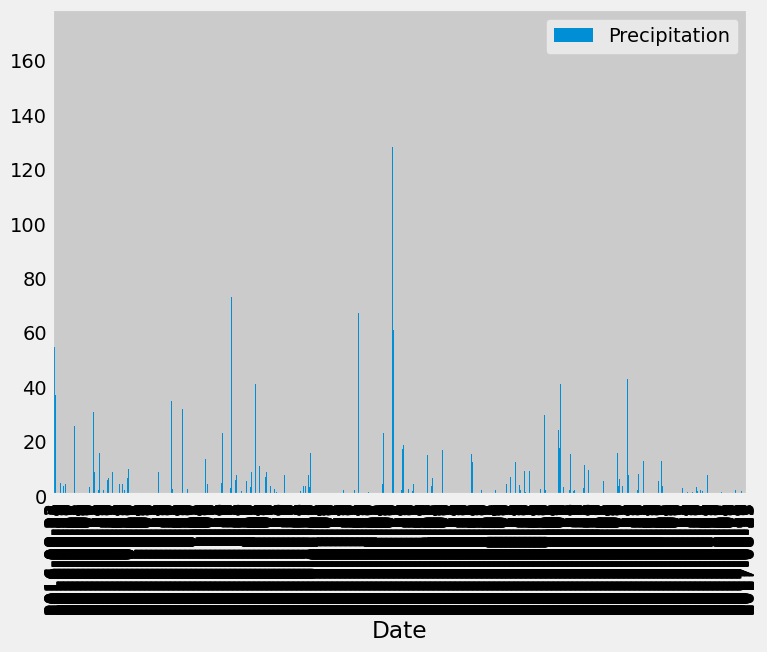

In [236]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df =  pd.DataFrame(scores, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
measurement_df_sorted = measurement_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.set_index('Date', inplace=True)

# Plot the precipitation data
# measurement_df_sorted.plot.bar()
# plt.xlabel('Date')
# plt.ylabel('mm')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
measurement_df_sorted.plot(x="Date", y="Precipitation", kind="bar", figsize=(8,6), rot=90)

In [213]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = measurement_df.describe()
summary_statistics

,Precipitation
count,2017.000000
mean,4.508180
std,11.723104
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [214]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [215]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [216]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()

most_active_station_id = most_active_station[0]

lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station_id).all()
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station_id).all()
average_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station_id).all()

print(lowest_temp, highest_temp, average_temp)

[(12.2,)] [(29.4,)] [(22.03582251082252,)]


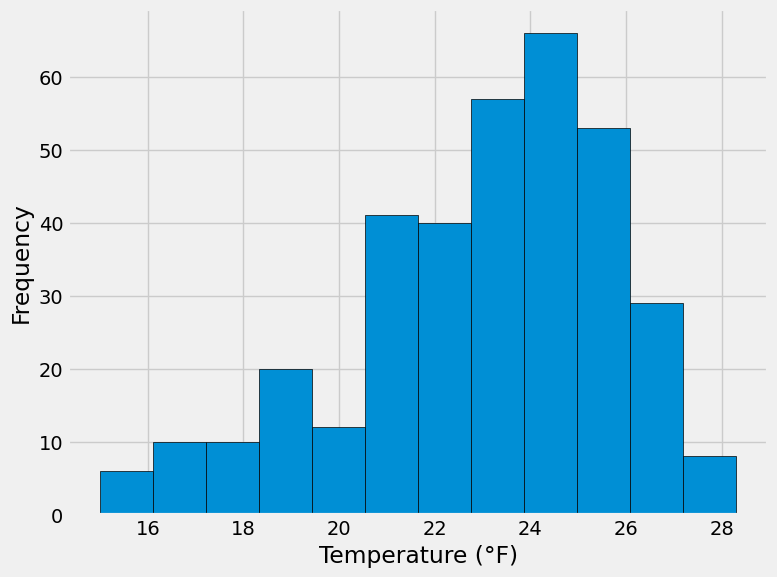

In [243]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).filter(measurement.station == most_active_station_id).filter(measurement.date >= query_date).all()

# Create a DataFrame from the query results
temp_df = pd.DataFrame(temp_data, columns=['Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temp_df['Temperature'], bins=12, edgecolor='k')
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()